In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image
from PIL import Image
from tensorflow.keras.models import load_model

In [50]:
segmodel = load_model('/content/drive/MyDrive/segmentation_model.h5')

In [51]:
detmodel = load_model('/content/drive/MyDrive/tb_detection_model.h5')

In [52]:
input_image = '/content/drive/MyDrive/TB data/Tuberculosis/Tuberculosis-102.png'

In [64]:
desired_width, desired_height = 128, 128

In [65]:
#preprocessing for segmentation
imag = cv2.imread(input_image)
imag = cv2.resize(imag, (desired_width, desired_height))
imag = cv2.cvtColor(imag, cv2.COLOR_RGB2GRAY)
imag = imag / 255.0
imag = np.expand_dims(imag, axis=-1)


In [66]:
#preprocessing for classifiaction
img= image.load_img(input_image , target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

In [67]:
mask = segmodel.predict(np.expand_dims(imag, axis=0))

1/1 [==============================] - 0s 19ms/step


In [68]:
prediction = detmodel.predict(img_array)

1/1 [==============================] - 0s 19ms/step


In [69]:
segmented = np.squeeze(imag).copy()
segmented[np.squeeze(mask)<0.2] = 0

In [70]:
class_labels = ['Normal', 'Tuberculosis']
predicted_class = class_labels[int(np.round(prediction[0]))]

img = mpimg.imread(input_image)

<ipython-input-70-5918dfd442ca>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = class_labels[int(np.round(prediction[0]))]


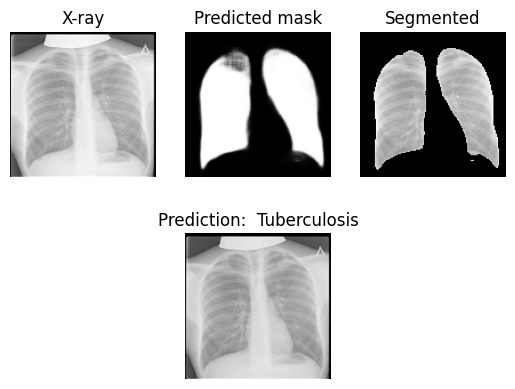

In [71]:
plt.subplot(2,3,1)
plt.imshow(np.squeeze(imag),cmap="gray")
plt.title("X-ray")
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(np.squeeze(mask[0]),cmap="gray")
plt.title("Predicted mask")
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(segmented,cmap="gray")
plt.title("Segmented")
plt.axis('off')

plt.subplot(2,3,5)
plt.imshow(img,cmap="gray")
plt.title(f'Prediction:  {predicted_class}')
plt.axis('off')
plt.show()

